# CAPSTONE

**Identifying Fake News**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,\
HashingVectorizer
import string
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords, wordnet
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk import pos_tag
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import spacy
import re
from sklearn.dummy import DummyClassifier
from wordcloud import WordCloud, STOPWORDS 
from PIL import Image
import requests
from os import path
import pickle
from nltk.util import ngrams
import nltk, re, string, collections

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acumu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Import CSVs and Data Cleaning

**Spacy Preprocessing Functions**

In [2]:
# Import list of stopwords from SpaCy
from spacy.lang.en.stop_words import STOP_WORDS
stop_words = spacy.lang.en.stop_words.STOP_WORDS

In [3]:
# Create a function to tokenize the text of the articles
punctuation = [*string.punctuation , *[str(x) for x in list(range(0,10))]]
nlp = spacy.load('en_core_web_sm')
def normalize(text):
    text = ''.join([x for x in text if x not in punctuation])
    toks = nlp(text)
    toks = [word.lemma_.lower().strip() for word in toks if word.pos_ != 'PRON']
    toks = [word for word in toks if word not in stop_words]
    return ' '.join(toks)

**Real News**

In [4]:
# Import real news articles
df_true = pd.read_csv('True.csv')
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
# Create target column
df_true = df_true.assign(status = 'Real')
df_true.head()

,title,text,subject,date,status
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real


In [6]:
# Remove city names and news sources from 'text' column
df_true['text']=df_true['text'].str.extract(r'(?<=\-\s)(.*)')

In [7]:
df_true.head()

,title,text,subject,date,status
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",Real
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",Real
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",Real
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",Real


In [8]:
df_true.shape

(21417, 5)

In [9]:
# Check for missing data
df_true.isnull().sum()

title       0
text       21
subject     0
date        0
status      0
dtype: int64

In [10]:
# Drop articles missing text
df_true.dropna(inplace=True)

In [11]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
status     0
dtype: int64

In [ ]:
# Apply tokenization function to the real articles. Create a new column for the processed articles
df_true['processed_articles'] = df_true['text'].map(lambda x: normalize(x))

In [ ]:
list(df_true.processed_articles)

In [ ]:
# Save the new processed data frame
pickle_out = open('pickled_files/df_spacy_true.pickle',"wb")
pickle.dump(df_true, pickle_out)
pickle_out.close()

In [12]:
infile = open('pickled_files/df_spacy_true.pickle','rb')
df_true = pickle.load(infile)
infile.close()

In [13]:
true_text = df_true.processed_articles

In [14]:
# Create a list of all of the tokenized words
true_list = []
for x in true_text:
    true_list.append(x)

In [15]:
len(str(true_list))

32359425

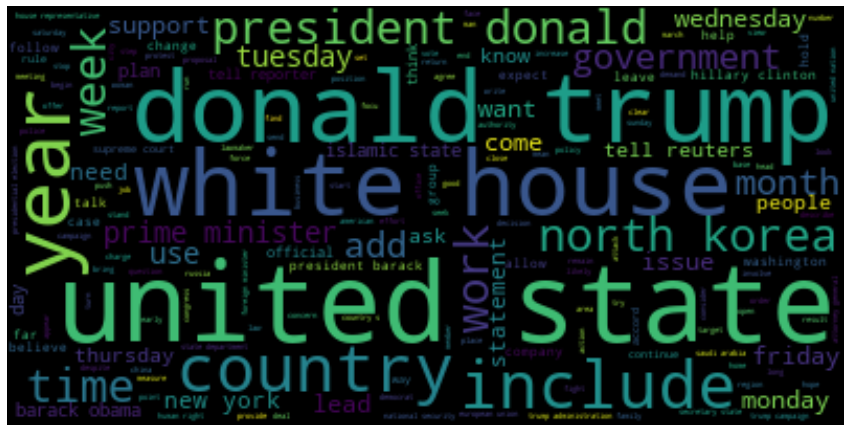

In [16]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(str(true_list))

# Display the generated image:
plt.figure(figsize = (15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
# Create a new list of stopwords
stopwords = ['``', 's', 'c', "'", ",", "t", "l", '...', ":", '0', '1', '2', 'couldn', 'wouldn', 'isn', 'aren', 'shouldn']
# Create a new tokenized list to use in the frequency distribution tables
true_tokenized_word = nltk.word_tokenize(str(true_list))

In [18]:
# Iterate through new tokenized list and remove additional stopwords.
true_tokenized_word = [word for word in true_tokenized_word if word not in stopwords]

In [19]:
# Create frequency distribution for the words in the real articles
true_fdist=nltk.FreqDist(true_tokenized_word)

In [20]:
print(true_fdist.most_common(20))

[('trump', 53953), ('president', 24744), ('state', 24139), ('government', 19384), ('year', 19200), ('house', 16618), ('new', 15667), ('tell', 15494), ('people', 15211), ('party', 14945), ('united', 14787), ('republican', 14617), ('official', 14457), ('country', 13965), ('election', 13854), ('states', 12316), ('include', 12154), ('campaign', 11592), ('group', 11053), ('vote', 10886)]


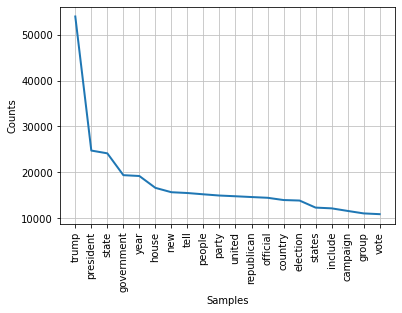

In [21]:
# Plot frequency distribution for the 20 most common words
true_fdist.plot(20)
plt.show()

In [22]:
# Get a list of all the bi-grams
true_bigrams = ngrams(true_tokenized_word, 2)

In [23]:
# List 20 most common bigrams
true_bigrams_freq = collections.Counter(true_bigrams)
true_bigrams_freq.most_common(20)

[(('united', 'states'), 11844),
 (('donald', 'trump'), 9783),
 (('white', 'house'), 8121),
 (('north', 'korea'), 5527),
 (('president', 'donald'), 4270),
 (('prime', 'minister'), 4100),
 (('new', 'york'), 3620),
 (('tell', 'reuters'), 3515),
 (('islamic', 'state'), 3321),
 (('barack', 'obama'), 3317),
 (('tell', 'reporter'), 3242),
 (('president', 'barack'), 2517),
 (('hillary', 'clinton'), 2426),
 (('supreme', 'court'), 2365),
 (('trump', 'administration'), 2343),
 (('secretary', 'state'), 2121),
 (('national', 'security'), 2112),
 (('house', 'representatives'), 2048),
 (('presidential', 'election'), 2015),
 (('united', 'nations'), 1970)]

In [24]:
true_bigram_fdist=nltk.FreqDist(true_bigrams_freq)

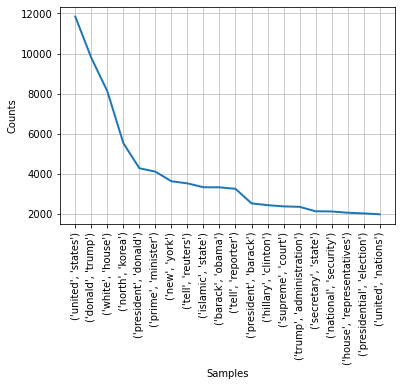

In [25]:
true_bigram_fdist.plot(20)
plt.show()

In [26]:
# Get a list of all the tri-grams
true_trigrams = ngrams(true_tokenized_word, 3)

In [27]:
# List 20 most common tri-grams
true_trigrams_freq = collections.Counter(true_trigrams)
true_trigrams_freq.most_common(20)

[(('president', 'donald', 'trump'), 4199),
 (('president', 'barack', 'obama'), 2510),
 (("'president", 'donald', 'trump'), 1556),
 (('respond', 'request', 'comment'), 832),
 (('president', 'vladimir', 'putin'), 764),
 (('state', 'rex', 'tillerson'), 671),
 (('george', 'w', 'bush'), 662),
 (('national', 'security', 'adviser'), 625),
 (('speaker', 'paul', 'ryan'), 606),
 (('leader', 'mitch', 'mcconnell'), 568),
 (('un', 'security', 'council'), 552),
 (('democratic', 'president', 'barack'), 545),
 (('chancellor', 'angela', 'merkel'), 539),
 (('secretary', 'state', 'rex'), 538),
 (('prime', 'minister', 'theresa'), 536),
 (('presidentelect', 'donald', 'trump'), 532),
 (('speak', 'condition', 'anonymity'), 519),
 (('new', 'york', 'times'), 516),
 (('russian', 'president', 'vladimir'), 509),
 (('white', 'house', 'official'), 502)]

In [28]:
true_trigram_fdist=nltk.FreqDist(true_trigrams_freq)

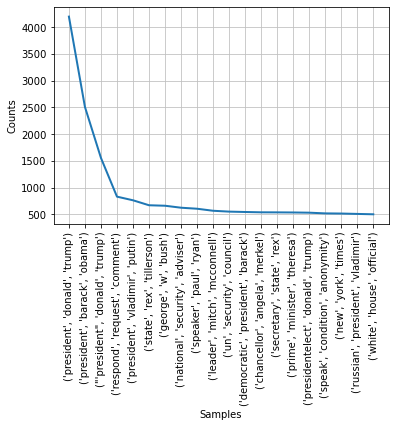

In [29]:
true_trigram_fdist.plot(20)
plt.show()

**Fake News**

In [30]:
# Import Fake news articles
df_fake = pd.read_csv('Fake.csv')
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [31]:
# Create target column
df_fake = df_fake.assign(status = 'Fake')
df_fake.head()

,title,text,subject,date,status
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [32]:
df_fake.shape

(23481, 5)

In [33]:
# Check for missing data
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
status     0
dtype: int64

In [ ]:
# Apply tokenization function to the real articles. Create a new column for the processed articles
df_fake['processed_articles'] = df_fake['text'].map(lambda x: normalize(x))

In [ ]:
list(df_fake.processed_articles)

In [ ]:
# Save the new processed data frame
pickle_out = open('pickled_files/df_spacy_fake.pickle',"wb")
pickle.dump(df_fake, pickle_out)
pickle_out.close()

In [34]:
infile = open('pickled_files/df_spacy_fake.pickle','rb')
df_fake = pickle.load(infile)
infile.close()

In [35]:
fake_text = df_fake.processed_articles

In [36]:
# Create a list of all of the tokenized words
fake_list = []
for x in fake_text:
    fake_list.append(x)

In [37]:
len(str(fake_list))

36692492

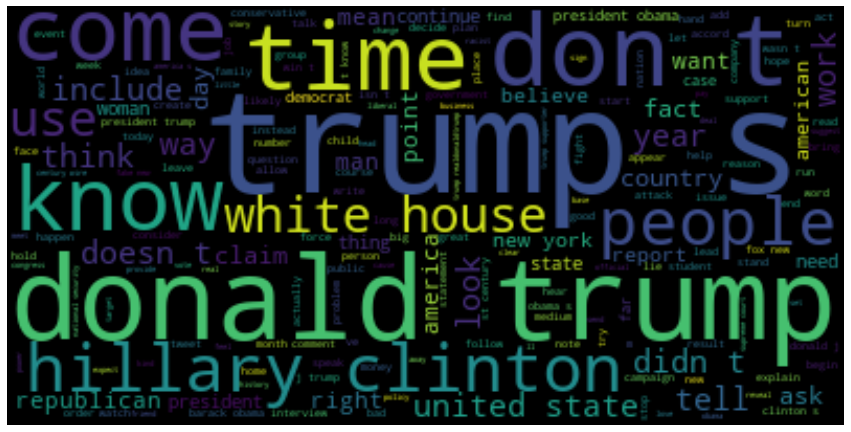

In [118]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(str(fake_list))

# Display the generated image:
plt.figure(figsize = (15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [39]:
# Create a new tokenized list to use in the frequency distribution tables
fake_tokenized_word = nltk.word_tokenize(str(fake_list))

In [40]:
# Iterate through new tokenized list and remove additional stopwords.
fake_tokenized_word = [word for word in fake_tokenized_word if word not in stopwords]

In [41]:
# Create frequency distribution for the words in the real articles
fake_fdist = nltk.FreqDist(fake_tokenized_word)

In [42]:
print(fake_fdist.most_common(20))

[('trump', 73656), ('people', 25945), ('president', 25760), ('like', 18317), ('clinton', 17984), ('obama', 17613), ('state', 17403), ('know', 16247), ('donald', 15813), ('time', 15079), ('year', 15049), ('tell', 14510), ('new', 14147), ('news', 14089), ('come', 13587), ('hillary', 13281), ('white', 13026), ('think', 12272), ('want', 12032), ('use', 11999)]


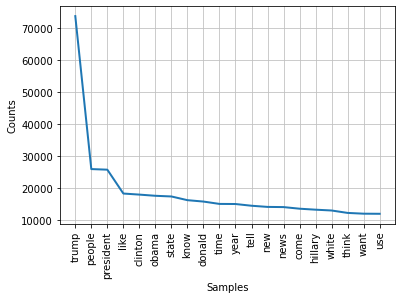

In [43]:
# Plot frequency distribution for the 20 most common words
fake_fdist.plot(20)
plt.show()

In [44]:
# Get a list of all the bi-grams
fake_bigrams = ngrams(fake_tokenized_word, 2)

In [45]:
# List 20 most common bi-grams
fake_bigrams_freq = collections.Counter(fake_bigrams)
fake_bigrams_freq.most_common(20)

[(('donald', 'trump'), 11790),
 (('hillary', 'clinton'), 6554),
 (('white', 'house'), 6230),
 (('united', 'states'), 6143),
 (('new', 'york'), 4142),
 (('president', 'obama'), 3731),
 (('president', 'trump'), 3527),
 (('fox', 'news'), 3101),
 (('barack', 'obama'), 2176),
 (('donald', 'j'), 2152),
 (('j', 'trump'), 2122),
 (('century', 'wire'), 1926),
 (('trump', 'supporter'), 1885),
 (('trump', 'campaign'), 1789),
 (('fake', 'news'), 1771),
 (('supreme', 'court'), 1751),
 (('trump', 'realdonaldtrump'), 1694),
 (('obama', 'administration'), 1643),
 (('national', 'security'), 1629),
 (('social', 'medium'), 1597)]

In [46]:
fake_ngram_fdist=nltk.FreqDist(fake_bigrams_freq)

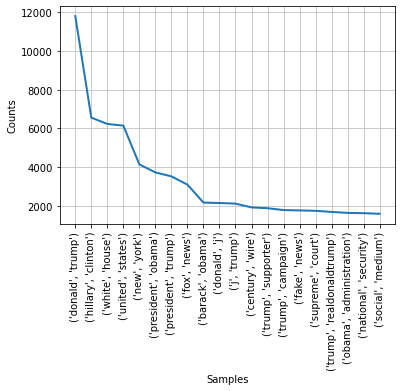

In [47]:
fake_ngram_fdist.plot(20)
plt.show()

In [48]:
# Get a list of all the tri-grams
fake_trigrams = ngrams(fake_tokenized_word, 3)

In [49]:
# List 20 most common tri-grams
fake_trigrams_freq = collections.Counter(fake_trigrams)
fake_trigrams_freq.most_common(20)

[(('donald', 'j', 'trump'), 2111),
 (('j', 'trump', 'realdonaldtrump'), 1692),
 (('new', 'york', 'times'), 1458),
 (('st', 'century', 'wire'), 1225),
 (('news', 'st', 'century'), 941),
 (('president', 'united', 'states'), 901),
 (('president', 'donald', 'trump'), 844),
 (('president', 'barack', 'obama'), 832),
 (('black', 'life', 'matter'), 808),
 (('subscribe', 'member', 'wiretv'), 737),
 (('video', 'screen', 'capture'), 728),
 (('image', 'video', 'screen'), 697),
 (("'st", 'century', 'wire'), 679),
 (('images', "'donald", 'trump'), 618),
 (('new', 'york', 'city'), 596),
 (('george', 'w', 'bush'), 559),
 (('director', 'james', 'comey'), 479),
 (('wire', 'subscribe', 'member'), 465),
 (('fbi', 'director', 'james'), 458),
 (('image', 'screen', 'capture'), 446)]

In [50]:
fake_trigram_fdist=nltk.FreqDist(fake_trigrams_freq)

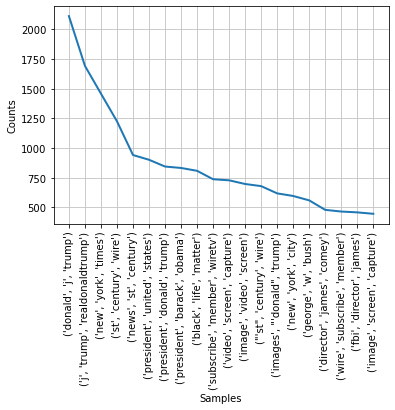

In [51]:
fake_trigram_fdist.plot(20)
plt.show()

**Join data frames**

In [52]:
# Concatenate the two dataframes
frames = [df_true, df_fake]
df=pd.concat(frames)

In [53]:
df.head()

,title,text,subject,date,status,processed_articles
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",Real,head conservative republican faction congress ...
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",Real,transgender people allow time enlist military ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",Real,special counsel investigation link russia pres...
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",Real,trump campaign adviser george papadopoulos tel...
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",Real,president donald trump postal service friday c...


In [54]:
df.tail()

,title,text,subject,date,status,processed_articles
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake,st century wire wire report early week unlikel...
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake,st century wire s familiar theme dispute chang...
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake,patrick henningsen st century wireremember ob...
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake,st century wire al jazeera america history big...
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",Fake,st century wire wire predict new year look ahe...


In [55]:
df.shape

(44877, 6)

In [56]:
# Shuffle rows
df = df.sample(frac = 1)

In [57]:
df.head()

,title,text,subject,date,status,processed_articles
20705,YRC Worldwide has limited operations in Florid...,YRC Worldwide Inc resumed limited operations a...,worldnews,"September 7, 2017",Real,yrc worldwide inc resume limited operation flo...
3722,U.S. House speaker confident tax reform can be...,U.S. House of Representatives Speaker Paul Rya...,politicsNews,"May 18, 2017",Real,house representatives speaker paul ryan thursd...
14657,'Missing' British film maker sighted in Papua ...,A British explorer reported missing while sear...,worldnews,"November 16, 2017",Real,british explorer report miss search remote tri...
14702,Hillary Clinton Is Asked The Difference Betwee...,Awkward! I am a progressive,politics,"Jan 6, 2016",Fake,awkward progressive
19144,SHOCKER! GRAMMY ATTENDEE Wears “Make America G...,Singer/songwriter Joy Villa decided to follow ...,left-news,"Feb 12, 2017",Fake,singersongwriter joy villa decide follow polit...


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44877 entries, 20705 to 3117
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               44877 non-null  object
 1   text                44877 non-null  object
 2   subject             44877 non-null  object
 3   date                44877 non-null  object
 4   status              44877 non-null  object
 5   processed_articles  44877 non-null  object
dtypes: object(6)
memory usage: 2.4+ MB


In [60]:
# Check for missing data
df.isnull().sum()

title                 0
text                  0
subject               0
date                  0
status                0
processed_articles    0
dtype: int64

## Train test split

In [61]:
# Separate features and labels 
X = df['processed_articles']
y = df.status

# Create test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

## Modeling

### Dummy Classifier

In [62]:
# Run dummy classifier to get baseline prediction
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X)
dummy_clf.score(X, y)

0.5232301624440137

In [63]:
# Create function to evaluate model and display confusion matrix
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    
    print(classification_report(y, y_pred))
    
    plot_confusion_matrix(model, X, y, cmap='Blues', xticks_rotation='vertical')

C:\Users\acumu\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        Fake       0.52      1.00      0.69     23481
        Real       0.00      0.00      0.00     21396

    accuracy                           0.52     44877
   macro avg       0.26      0.50      0.34     44877
weighted avg       0.27      0.52      0.36     44877



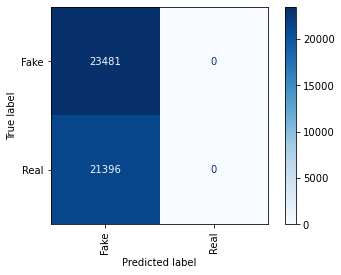

In [64]:
evaluate_model(dummy_clf, X, y)

### Logistic Regression

**Simple Logistic Regression Pipeline** 

In [65]:
# Create a simple logistic regression pipeline including model and vectorizer 
lr_pipeline = Pipeline(steps=[
    ('vectorizer', TfidfVectorizer()),
    ('lr', LogisticRegression())
])

In [66]:
# Fit the pipeline to the training data
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('lr', LogisticRegression())])

In [67]:
pd.DataFrame(lr_pipeline.predict(X_test)).value_counts()

Fake    5885
Real    5335
dtype: int64

              precision    recall  f1-score   support

        Fake       0.99      0.98      0.98     17568
        Real       0.98      0.98      0.98     16089

    accuracy                           0.98     33657
   macro avg       0.98      0.98      0.98     33657
weighted avg       0.98      0.98      0.98     33657



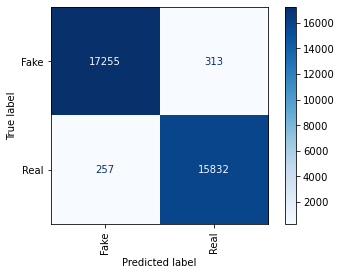

In [68]:
evaluate_model(lr_pipeline, X_train, y_train)

              precision    recall  f1-score   support

        Fake       0.97      0.97      0.97      5913
        Real       0.97      0.97      0.97      5307

    accuracy                           0.97     11220
   macro avg       0.97      0.97      0.97     11220
weighted avg       0.97      0.97      0.97     11220



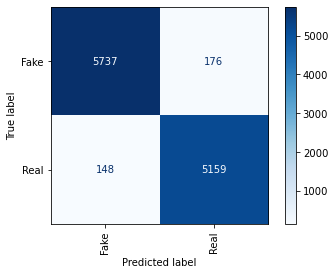

In [69]:
evaluate_model(lr_pipeline, X_test, y_test)

**Logistic Regression Pipeline with hyperparameters tuned**

In [70]:
# Create a logistic regression pipeline including a tuned model and vectorizer
lr_pipeline2 = Pipeline(steps=[
    ('vectorizer', TfidfVectorizer(min_df=10, max_df=.9, ngram_range = (1, 2))),
    ('lr', LogisticRegression(solver='saga', 
                              max_iter = 500, 
                              C=1, 
                              penalty='l2', 
                              verbose=1, 
                              n_jobs=-1,
                              random_state=42))
])

In [71]:
# Fit the model to the training data
lr_pipeline2.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


convergence after 18 epochs took 2 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s finished


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('lr',
                 LogisticRegression(C=1, max_iter=500, n_jobs=-1,
                                    random_state=42, solver='saga',
                                    verbose=1))])

In [72]:
pd.DataFrame(lr_pipeline2.predict(X_test)).value_counts()

Fake    5891
Real    5329
dtype: int64

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99     17568
        Real       0.98      0.99      0.99     16089

    accuracy                           0.99     33657
   macro avg       0.99      0.99      0.99     33657
weighted avg       0.99      0.99      0.99     33657



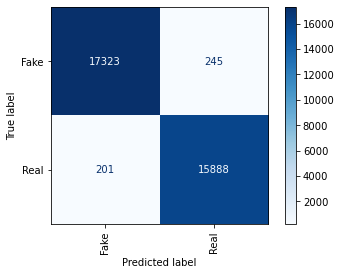

In [73]:
evaluate_model(lr_pipeline2, X_train, y_train)

              precision    recall  f1-score   support

        Fake       0.98      0.97      0.98      5913
        Real       0.97      0.98      0.97      5307

    accuracy                           0.98     11220
   macro avg       0.98      0.98      0.98     11220
weighted avg       0.98      0.98      0.98     11220



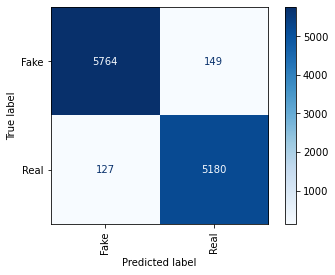

In [74]:
evaluate_model(lr_pipeline2, X_test, y_test)

**Logistic Regression Pipeline with Gridsearch**

In [75]:
# Create a logistic regression pipeline including a tuned model and vectorizer
lr_pipeline_3 = Pipeline(steps=[
    ('vectorizer', TfidfVectorizer()),
    ('lr', LogisticRegression(class_weight='balanced', solver='saga', random_state=42))
])

In [76]:
# Define gridsearch parameters
lr_param_grid = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10],
    'lr__penalty': ['l1', 'l2'],
    'lr__max_iter': [500, 1000],
    'vectorizer__max_df': np.linspace(.7,1,5),
    'vectorizer__min_df': [10],
    'vectorizer__ngram_range': [(1, 2)]
}

In [77]:
# Combine logistic regression pipeline with gridsearch
lr_grid = GridSearchCV(lr_pipeline_3, 
                       lr_param_grid,
                       cv=5,
                       scoring='f1_weighted',
                       verbose=1,
                       n_jobs=-1)

In [78]:
# Fit pipeline with gridsearch to the training data
lr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 49.5min finished
C:\Users\acumu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('lr',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=42,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'lr__C': [0.001, 0.01, 0.1, 1, 10],
                         'lr__max_iter': [500, 1000],
                         'lr__penalty': ['l1', 'l2'],
                         'vectorizer__max_df': array([0.7  , 0.775, 0.85 , 0.925, 1.   ]),
                         'vectorizer__min_df': [10],
                         'vectorizer__ngram_range': [(1, 2)]},
             scoring='f1_weighted', verbose=1)

In [79]:
# Display best parameters
lr_grid.best_params_

{'lr__C': 10,
 'lr__max_iter': 500,
 'lr__penalty': 'l1',
 'vectorizer__max_df': 0.7,
 'vectorizer__min_df': 10,
 'vectorizer__ngram_range': (1, 2)}

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00     17568
        Real       1.00      1.00      1.00     16089

    accuracy                           1.00     33657
   macro avg       1.00      1.00      1.00     33657
weighted avg       1.00      1.00      1.00     33657



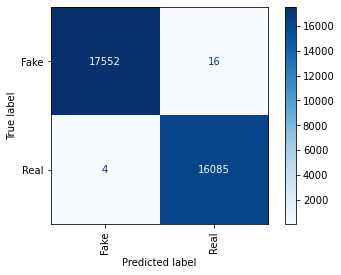

In [80]:
evaluate_model(lr_grid, X_train, y_train)

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      5913
        Real       0.99      0.98      0.99      5307

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



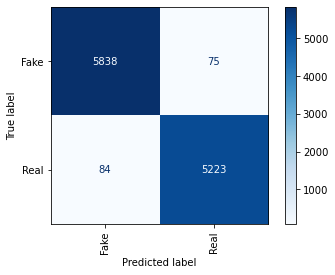

In [81]:
evaluate_model(lr_grid, X_test, y_test)

In [82]:
lr_grid_model = lr_grid.best_estimator_.fit(X_train, y_train)

C:\Users\acumu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [83]:
# Save the model
pickle_out = open('pickled_files/lr_grid_model.pickle',"wb")
pickle.dump(lr_grid_model, pickle_out)
pickle_out.close()

In [ ]:
infile = open('pickled_files/lr_grid_model.pickle','rb')
lr_grid_model = pickle.load(infile)
infile.close()

### Naive Bayes

**Naive Bayes Pipeline**

In [84]:
# Create a tuned multinomial naive bayes pipeline including a model and vectorizer
nb_pipeline = imbPipeline(steps=[
    ('vectorizer', TfidfVectorizer(min_df=10, max_df=0.9)),
    ('nb', MultinomialNB())
])

In [85]:
# Fit the pipeline to the training data
nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(max_df=0.9, min_df=10)),
                ('nb', MultinomialNB())])

              precision    recall  f1-score   support

        Fake       0.93      0.94      0.94     17568
        Real       0.94      0.92      0.93     16089

    accuracy                           0.93     33657
   macro avg       0.93      0.93      0.93     33657
weighted avg       0.93      0.93      0.93     33657



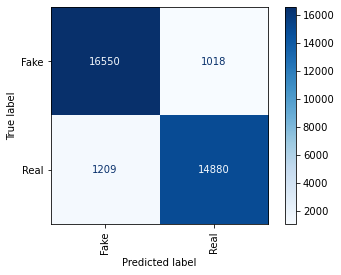

In [86]:
evaluate_model(nb_pipeline, X_train, y_train)

              precision    recall  f1-score   support

        Fake       0.92      0.94      0.93      5913
        Real       0.93      0.91      0.92      5307

    accuracy                           0.92     11220
   macro avg       0.92      0.92      0.92     11220
weighted avg       0.92      0.92      0.92     11220



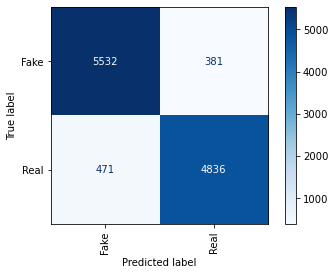

In [87]:
evaluate_model(nb_pipeline, X_test, y_test)

**Naive Bayes Pipeline with Gridsearch**

In [88]:
# Create a  multinomial naive bayes pipeline including a model and vectorizer
nb_pipeline_2 = imbPipeline(steps=[
    ('vectorizer', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [89]:
# Define gridsearch parameters
nb_param_grid = {
    'nb__alpha': np.linspace(0, 4, 10),
    'vectorizer__max_df': np.linspace(.8,1,5),
    'vectorizer__min_df': [10],
    'vectorizer__norm': ['l1', 'l2']
    }

In [90]:
# Combine Naive Bayes pipeline with gridsearch
nb_grid = GridSearchCV(nb_pipeline_2, 
                       nb_param_grid,
                       cv=5,
                       scoring='f1_weighted',
                       verbose=1,
                       n_jobs=-1)

In [91]:
# Fit pipeline with gridsearch 
nb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  7.6min finished
C:\Users\acumu\anaconda3\envs\learn-env\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'nb__alpha': array([0.        , 0.44444444, 0.88888889, 1.33333333, 1.77777778,
       2.22222222, 2.66666667, 3.11111111, 3.55555556, 4.        ]),
                         'vectorizer__max_df': array([0.8 , 0.85, 0.9 , 0.95, 1.  ]),
                         'vectorizer__min_df': [10],
                         'vectorizer__norm': ['l1', 'l2']},
             scoring='f1_weighted', verbose=1)

In [92]:
# Display best parameters
nb_grid.best_params_

{'nb__alpha': 0.0,
 'vectorizer__max_df': 0.8,
 'vectorizer__min_df': 10,
 'vectorizer__norm': 'l2'}

              precision    recall  f1-score   support

        Fake       0.94      0.98      0.96     17568
        Real       0.98      0.93      0.95     16089

    accuracy                           0.96     33657
   macro avg       0.96      0.95      0.96     33657
weighted avg       0.96      0.96      0.96     33657



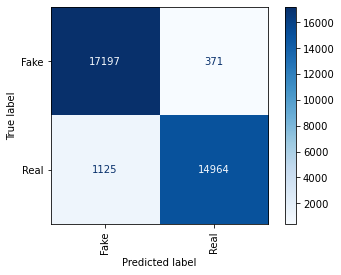

In [93]:
evaluate_model(nb_grid, X_train, y_train)

              precision    recall  f1-score   support

        Fake       0.92      0.97      0.94      5913
        Real       0.96      0.90      0.93      5307

    accuracy                           0.94     11220
   macro avg       0.94      0.94      0.94     11220
weighted avg       0.94      0.94      0.94     11220



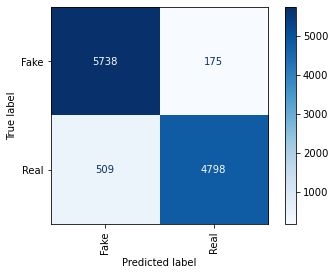

In [94]:
evaluate_model(nb_grid, X_test, y_test)

In [95]:
nb_grid_model = nb_grid.best_estimator_.fit(X_train, y_train)

C:\Users\acumu\anaconda3\envs\learn-env\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


In [96]:
# Save the model
pickle_out = open('pickled_files/nb_grid_model.pickle',"wb")
pickle.dump(nb_grid_model, pickle_out)
pickle_out.close()

In [ ]:
infile = open('pickled_files/nb_grid_model.pickle','rb')
nb_grid_model = pickle.load(infile)
infile.close()

### Random Forest

**Simple Random Forest Pipleline**

In [97]:
# Create a tuned random forest classifier pipeline including a model and vectorizer 
rf_pipeline = Pipeline(steps=[
    ('vectorizer', TfidfVectorizer(min_df=10, max_df=0.9)),
    ('rf', RandomForestClassifier(n_estimators=10)),
])

In [98]:
# Fit the pipeline to the training data
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(max_df=0.9, min_df=10)),
                ('rf', RandomForestClassifier(n_estimators=10))])

In [99]:
pd.DataFrame(rf_pipeline.predict(X_test)).value_counts()

Fake    6071
Real    5149
dtype: int64

In [100]:
# Display f1-score for the testing data
f1_score(y_test, rf_pipeline.predict(X_test), average = 'weighted')

0.9473646724464754

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00     17568
        Real       1.00      1.00      1.00     16089

    accuracy                           1.00     33657
   macro avg       1.00      1.00      1.00     33657
weighted avg       1.00      1.00      1.00     33657



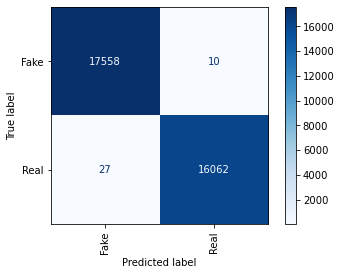

In [101]:
evaluate_model(rf_pipeline, X_train, y_train)

              precision    recall  f1-score   support

        Fake       0.94      0.96      0.95      5913
        Real       0.96      0.93      0.94      5307

    accuracy                           0.95     11220
   macro avg       0.95      0.95      0.95     11220
weighted avg       0.95      0.95      0.95     11220



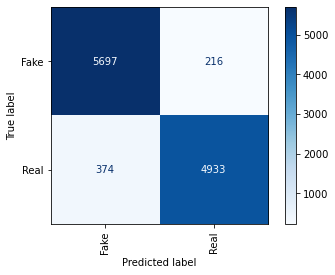

In [102]:
evaluate_model(rf_pipeline, X_test, y_test)

### Voting Classifier

In [108]:
# instantiate the three models already used with the best hyper parameters from grid search where applicable
lr=LogisticRegression(C=10, max_iter=500, penalty='l2')
nb=MultinomialNB(alpha=0.0)
rf=RandomForestClassifier(n_estimators=10)

In [109]:
# Create a voting classifier pipeline including the three models listed above and a vecotrizer
vc_pipeline = Pipeline(steps=[
    ('vectorizer', TfidfVectorizer(min_df=10,max_df=.8)),
    ('vc', VotingClassifier(
                estimators=[('LogisticRegression', lr), ('randomforest', rf), ('NaiveBayes', nb)], 
                voting='hard')),
    
])

In [110]:
# fit the model to the training data
vc_pipeline.fit(X_train, y_train)

C:\Users\acumu\anaconda3\envs\learn-env\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Pipeline(steps=[('vectorizer', TfidfVectorizer(max_df=0.8, min_df=10)),
                ('vc',
                 VotingClassifier(estimators=[('LogisticRegression',
                                               LogisticRegression(C=10,
                                                                  max_iter=500)),
                                              ('randomforest',
                                               RandomForestClassifier(n_estimators=10)),
                                              ('NaiveBayes',
                                               MultinomialNB(alpha=0.0))]))])

In [111]:
# Display the f-1 score for the testing data
f1_score(y_test, vc_pipeline.predict(X_test),average = 'weighted')

0.9750311513511686

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00     17568
        Real       1.00      1.00      1.00     16089

    accuracy                           1.00     33657
   macro avg       1.00      1.00      1.00     33657
weighted avg       1.00      1.00      1.00     33657



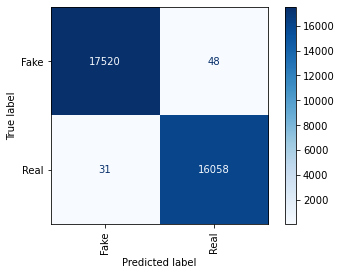

In [112]:
evaluate_model(vc_pipeline, X_train, y_train)

              precision    recall  f1-score   support

        Fake       0.97      0.98      0.98      5913
        Real       0.98      0.96      0.97      5307

    accuracy                           0.98     11220
   macro avg       0.98      0.97      0.97     11220
weighted avg       0.98      0.98      0.98     11220



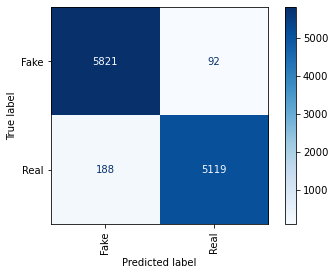

In [113]:
evaluate_model(vc_pipeline, X_test, y_test)

In [114]:
vc_pipe_model = vc_pipeline.fit(X_train, y_train)

C:\Users\acumu\anaconda3\envs\learn-env\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


In [115]:
# Save the model
pickle_out = open('pickled_files/vc_pipe_model.pickle',"wb")
pickle.dump(vc_pipe_model, pickle_out)
pickle_out.close()

In [ ]:
infile = open('pickled_files/vc_pipe_model.pickle','rb')
vc_pipe_model = pickle.load(infile)
infile.close()

**Fin**